In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#建立显示图片的函数
def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

(1054, 703, 3)


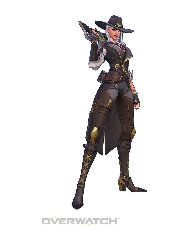

In [3]:
#导入前景图
img=cv2.imread('img.png') #图片导入
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #转换颜色模型
print(img.shape) #打印图片规格
show(img) #显示图片

(1079, 1920, 3)


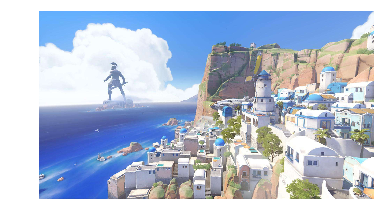

In [4]:
#导入背景图
back_img = cv2.imread('back_img.jpg') #图片导入
back_img = cv2.cvtColor(back_img,cv2.COLOR_BGR2RGB) #转换颜色模型
print(back_img.shape) #打印图片规格
show(back_img) #显示图片

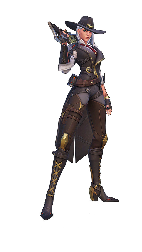

In [5]:
#裁剪图片
img = img[0:1000,150:550] #裁剪图片大小
show(img) #显示图片

In [6]:
#缩放图片
print(img.shape) #打印图片规格
img=cv2.resize(img,None,fx=0.9,fy=0.9) #图片缩小10%
print(img.shape) #打印图片规格

(1000, 400, 3)
(900, 360, 3)


In [7]:
#拆分图片信息
rows,cols,channels = img.shape #拆分图片信息

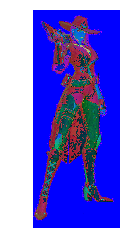

In [8]:
#转换格式
img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV) #把图片转换成HSV格式，用于抠图
show(img_hsv) #显示图片

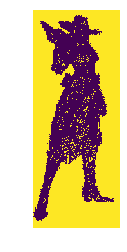

In [9]:
#抠图
lower_blue=np.array([0,0,0]) #获取最小阈值
upper_blue=np.array([0,255,255]) #获取最大阈值
mask = cv2.inRange(img_hsv, lower_blue, upper_blue) #创建遮罩
show(mask) #显示遮罩

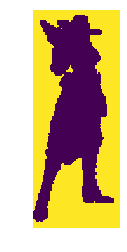

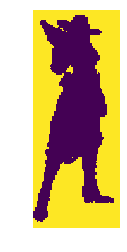

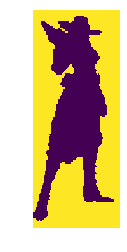

In [10]:
erode=cv2.erode(mask,None,iterations=3) #图像腐蚀
show(erode) #显示图片
dilate=cv2.dilate(erode,None,iterations=1) #图像膨胀
show(dilate) #显示图片

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, 
                           cv2.getStructuringElement(cv2.MORPH_ELLIPSE, 
                                        (8,8))) #开运算
show(opening) #显示图片

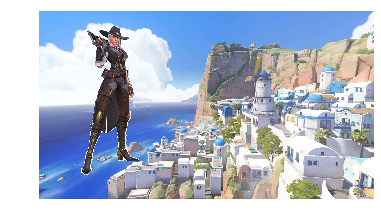

In [11]:
center = [70,240] #设置前景图开始位置
for i in range(rows):
    for j in range(cols):
        if opening[i,j]==0: #代表黑色
            back_img[center[0]+i,center[1]+j] =img[i,j] #赋值颜色
show(back_img) #显示图片

In [12]:
back_img = cv2.cvtColor(back_img,cv2.COLOR_RGB2BGR) #图像格式转换
back_img=cv2.resize(back_img,None,fx=0.8,fy=0.8) #图像缩放20%
cv2.imwrite('result.png',back_img) #保存图像

True